In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/chand/Downloads/Titanic/Titanic-Dataset.csv", usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [20]:
m_train = X_train['Age_imputed'].isnull().sum()

# 2. Get the number of NaNs we need to fill in X_test
m_test = X_test['Age_imputed'].isnull().sum()

# 3. Create the replacement values
#    (Note: You should sample from your *training* data for both to prevent data leakage)
non_missing_ages = X_train['Age'].dropna()

#doing random_state = int(X_train['fare']) will give same age for same fare each time. good
# to make stable models in production
imputed_values_train = non_missing_ages.sample(m_train, replace=True, random_state=42).values
imputed_values_test = non_missing_ages.sample(m_test, replace=True, random_state=42).values

# 4. Use .loc[] to assign the values safely
#    Syntax: df.loc[<row_mask>, <column_name>] = <values>
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = imputed_values_train
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = imputed_values_test
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,19.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


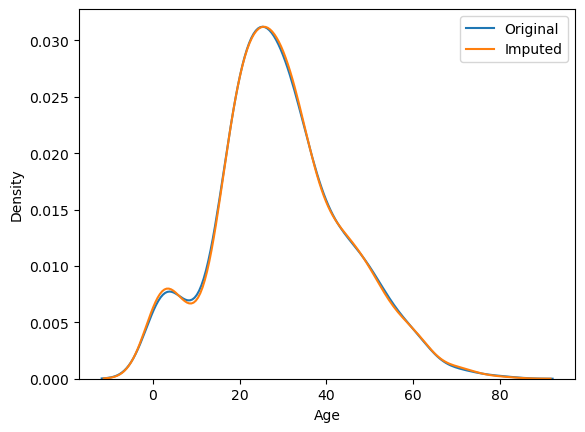

In [21]:
sns.kdeplot(X_train['Age'],label = 'Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')
plt.legend()
plt.show()

In [22]:
print("Original variable variance: ", X_train['Age'].var())
print("Variance after random imputation: ",X_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  211.9732756773575


In [23]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,69.416643
Age,71.580633,210.251707,210.251707
Age_imputed,69.416643,210.251707,211.973276


<Axes: >

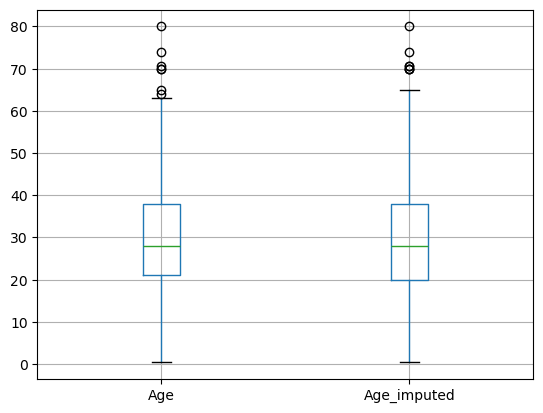

In [24]:
X_train[['Age','Age_imputed']].boxplot()